In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.0.0
accelerate                   0.29.2
aiohttp                      3.9.3
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.3.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
boto3                        1.34.81
botocore                     1.34.81
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                        

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import cv2
import imghdr

In [6]:
data_dir = "data"

In [7]:
image_exts = {"png", "jpg", "jpeg", "bmp"}

In [8]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [9]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [10]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 445 files belonging to 2 classes.


2024-04-25 09:44:33.415020: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-04-25 09:44:33.415048: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-04-25 09:44:33.415052: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-04-25 09:44:33.415084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-25 09:44:33.415098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
data_iteretaor = data.as_numpy_iterator()

In [12]:
data_iteretaor

In [13]:
batch = data_iteretaor.next()

2024-04-25 09:44:42.481356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:44:42.567905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:44:42.740838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [14]:
batch

(array([[[[253.02539  , 253.02539  , 253.02539  ],
          [253.0361   , 253.0361   , 253.0361   ],
          [253.02539  , 253.02539  , 253.02539  ],
          ...,
          [236.02539  , 236.02539  , 236.02539  ],
          [236.44727  , 236.44727  , 236.44727  ],
          [236.02539  , 236.02539  , 236.02539  ]],
 
         [[253.14062  , 253.14062  , 253.14062  ],
          [253.46591  , 253.46591  , 253.46591  ],
          [253.35043  , 253.35043  , 253.35043  ],
          ...,
          [236.35043  , 236.35043  , 236.35043  ],
          [236.46591  , 236.46591  , 236.46591  ],
          [236.20609  , 236.20609  , 236.20609  ]],
 
         [[253.14062  , 253.14062  , 253.14062  ],
          [253.9266   , 253.9266   , 253.9266   ],
          [253.91074  , 253.91074  , 253.91074  ],
          ...,
          [236.91074  , 236.91074  , 236.91074  ],
          [236.42188  , 236.42188  , 236.42188  ],
          [236.14062  , 236.14062  , 236.14062  ]],
 
         ...,
 
         [[2

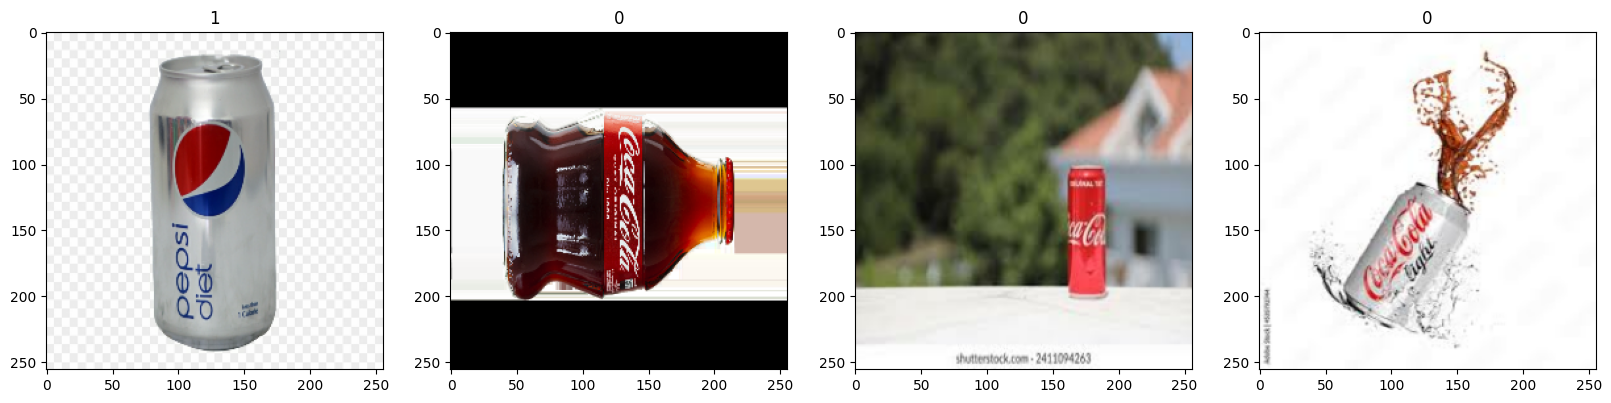

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 : Coca-Cola
Class 1 : Pepsi

In [16]:
### Data Scaling
data = data.map(lambda x, y: (x / 255, y))

In [17]:
data.as_numpy_iterator().next()

2024-04-25 09:44:53.783667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:44:53.867668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:44:54.040832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

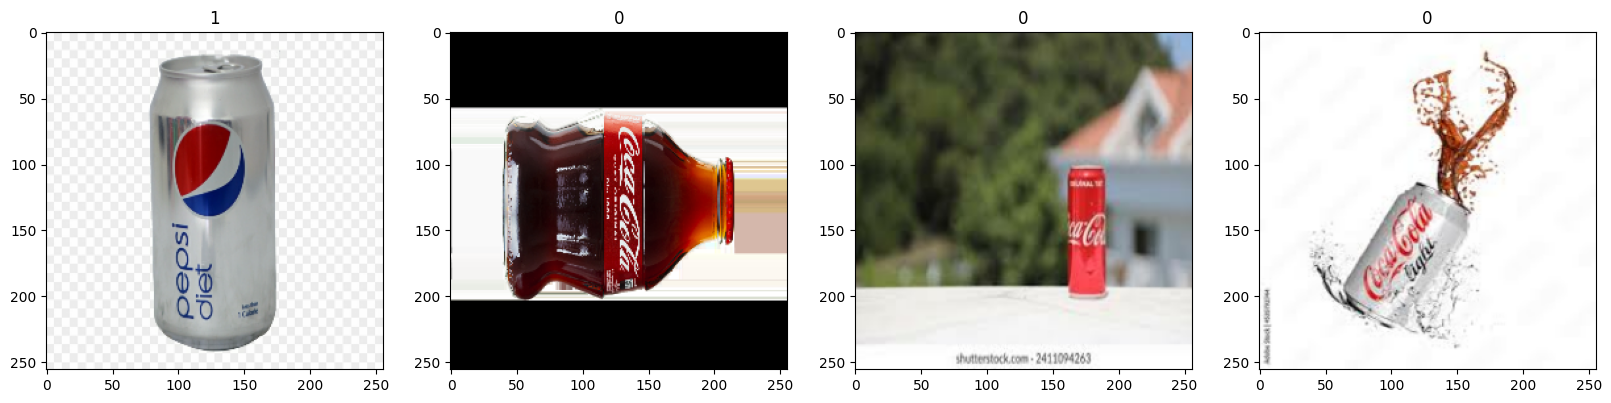

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data_length = len(data)
data_length

14

In [23]:
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [24]:
train_size + val_size + test_size

14

In [25]:
val_size

2

In [26]:
test_size

3

In [27]:
train_size

9

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [29]:
len(test)

3

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential(
    [
        Conv2D(
            16, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)
        ),
        MaxPooling2D(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model (example)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [32]:
logdir = "logs"

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20


2024-04-25 09:46:36.171894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-25 09:46:36.352584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:36.436388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:36.609976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


8/9 [=========================>....] - ETA: 0s - loss: 1.4096 - accuracy: 0.5820

2024-04-25 09:46:37.250927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:37.334769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:37.512316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 2s 122ms/step - loss: 1.3495 - accuracy: 0.5625 - val_loss: 0.7963 - val_accuracy: 0.3125
Epoch 2/20


2024-04-25 09:46:37.946642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:38.029970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.7039 - accuracy: 0.3500

2024-04-25 09:46:38.201177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.6447 - accuracy: 0.5278

2024-04-25 09:46:38.662610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:38.749186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:38.923815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 116ms/step - loss: 0.6447 - accuracy: 0.5278 - val_loss: 0.4593 - val_accuracy: 0.9375
Epoch 3/20


2024-04-25 09:46:39.313692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:39.397411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.3936 - accuracy: 0.8875

2024-04-25 09:46:39.570684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.9062

2024-04-25 09:46:40.028370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:40.110742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:40.285681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 115ms/step - loss: 0.3520 - accuracy: 0.9062 - val_loss: 0.4135 - val_accuracy: 0.8750
Epoch 4/20


2024-04-25 09:46:40.673885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:40.755096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.1805 - accuracy: 0.9312

2024-04-25 09:46:40.929329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2162 - accuracy: 0.9201

2024-04-25 09:46:41.393276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:41.477746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:41.652259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 116ms/step - loss: 0.2162 - accuracy: 0.9201 - val_loss: 0.3559 - val_accuracy: 0.9062
Epoch 5/20


2024-04-25 09:46:42.044808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:42.130266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.2309 - accuracy: 0.9312

2024-04-25 09:46:42.311048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9444

2024-04-25 09:46:42.773335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:42.856474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:43.031798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 117ms/step - loss: 0.2075 - accuracy: 0.9444 - val_loss: 0.2254 - val_accuracy: 0.9531
Epoch 6/20


2024-04-25 09:46:43.428498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:43.514014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.1614 - accuracy: 0.9563

2024-04-25 09:46:43.689796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9583

2024-04-25 09:46:44.164026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:44.247954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:44.423547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 118ms/step - loss: 0.1392 - accuracy: 0.9583 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 7/20


2024-04-25 09:46:44.821242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:44.905118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0658 - accuracy: 0.9937

2024-04-25 09:46:45.081830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9826

2024-04-25 09:46:45.552034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:45.636480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:45.816162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 119ms/step - loss: 0.1432 - accuracy: 0.9826 - val_loss: 0.1521 - val_accuracy: 0.9531
Epoch 8/20


2024-04-25 09:46:46.217355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:46.302381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.1776 - accuracy: 0.9688

2024-04-25 09:46:46.480831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1533 - accuracy: 0.9653

2024-04-25 09:46:46.945635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:47.030573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:47.209284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 118ms/step - loss: 0.1533 - accuracy: 0.9653 - val_loss: 0.0634 - val_accuracy: 0.9844
Epoch 9/20


2024-04-25 09:46:47.609679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:47.696078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0616 - accuracy: 0.9937

2024-04-25 09:46:47.875785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9826

2024-04-25 09:46:48.345672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:48.433605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:48.613156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 120ms/step - loss: 0.0939 - accuracy: 0.9826 - val_loss: 0.0683 - val_accuracy: 0.9688
Epoch 10/20


2024-04-25 09:46:49.012588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:49.098920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.1065 - accuracy: 0.9688

2024-04-25 09:46:49.276408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9653

2024-04-25 09:46:49.743722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:49.829084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:50.008955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 118ms/step - loss: 0.1148 - accuracy: 0.9653 - val_loss: 0.0489 - val_accuracy: 0.9844
Epoch 11/20


2024-04-25 09:46:50.405802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:50.491832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.1017 - accuracy: 0.9688

2024-04-25 09:46:50.672714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9826

2024-04-25 09:46:51.144838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:51.231738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:51.412436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 119ms/step - loss: 0.0652 - accuracy: 0.9826 - val_loss: 0.1235 - val_accuracy: 0.9688
Epoch 12/20


2024-04-25 09:46:51.811345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:51.897652: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0729 - accuracy: 0.9937

2024-04-25 09:46:52.077012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0645 - accuracy: 0.9896

2024-04-25 09:46:52.546873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:52.634997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:52.815874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 120ms/step - loss: 0.0645 - accuracy: 0.9896 - val_loss: 0.2602 - val_accuracy: 0.9531
Epoch 13/20


2024-04-25 09:46:53.228898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:53.317119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0487 - accuracy: 0.9875

2024-04-25 09:46:53.499940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9861

2024-04-25 09:46:53.969516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:54.057485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:54.239126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 119ms/step - loss: 0.0552 - accuracy: 0.9861 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 14/20


2024-04-25 09:46:54.638455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:54.725157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0582 - accuracy: 0.9875

2024-04-25 09:46:54.905068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9896

2024-04-25 09:46:55.375390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:55.463003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:55.644819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 119ms/step - loss: 0.0567 - accuracy: 0.9896 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 15/20


2024-04-25 09:46:56.047247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:56.133764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9812

2024-04-25 09:46:56.313691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9861

2024-04-25 09:46:56.791105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:56.877910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:57.058121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 119ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.2877 - val_accuracy: 0.9844
Epoch 16/20


2024-04-25 09:46:57.456350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:57.544446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0486 - accuracy: 0.9875

2024-04-25 09:46:57.725270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9861

2024-04-25 09:46:58.199230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:58.285828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:58.467946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 121ms/step - loss: 0.0490 - accuracy: 0.9861 - val_loss: 0.0566 - val_accuracy: 0.9844
Epoch 17/20


2024-04-25 09:46:58.873002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:58.961718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0725 - accuracy: 0.9750

2024-04-25 09:46:59.143153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9792

2024-04-25 09:46:59.627078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:59.715716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:46:59.899624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 123ms/step - loss: 0.1097 - accuracy: 0.9792 - val_loss: 0.0634 - val_accuracy: 0.9844
Epoch 18/20


2024-04-25 09:47:00.310154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:00.397471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9812

2024-04-25 09:47:00.577276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9861

2024-04-25 09:47:01.055927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:01.145128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:01.327346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 120ms/step - loss: 0.0679 - accuracy: 0.9861 - val_loss: 0.0893 - val_accuracy: 0.9688
Epoch 19/20


2024-04-25 09:47:01.729761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:01.819019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0113 - accuracy: 1.0000

2024-04-25 09:47:01.997997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9931

2024-04-25 09:47:02.475324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:02.564055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:02.747248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 121ms/step - loss: 0.0476 - accuracy: 0.9931 - val_loss: 0.2709 - val_accuracy: 0.9531
Epoch 20/20


2024-04-25 09:47:03.151712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:03.240145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


5/9 [===============>..............] - ETA: 0s - loss: 0.0284 - accuracy: 0.9937

2024-04-25 09:47:03.421654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9931

2024-04-25 09:47:03.897745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:03.986063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:04.168116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 121ms/step - loss: 0.0248 - accuracy: 0.9931 - val_loss: 0.0041 - val_accuracy: 1.0000


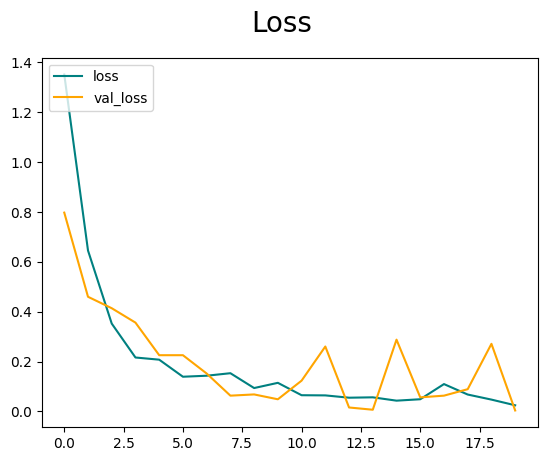

In [35]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

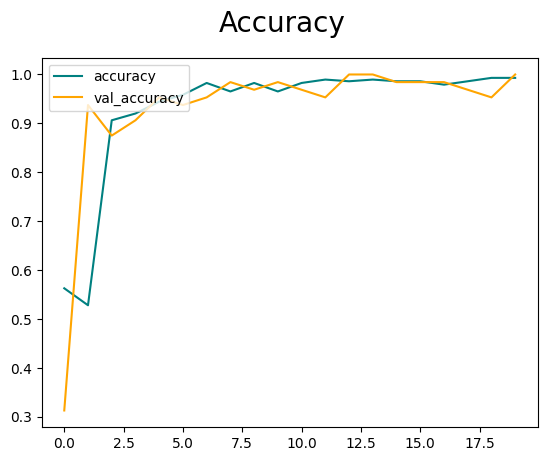

In [36]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-25 09:47:27.487209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:27.573317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-25 09:47:27.753942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 59ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32) tf.Tensor(0.97849464, shape=(), dtype=float32)


In [41]:
import cv2

In [42]:
def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
capture_image_from_camera(image_path)

2024-04-25 09:47:47.682 Python[27315:1197048] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


Image saved to your_image_path_here.jpg


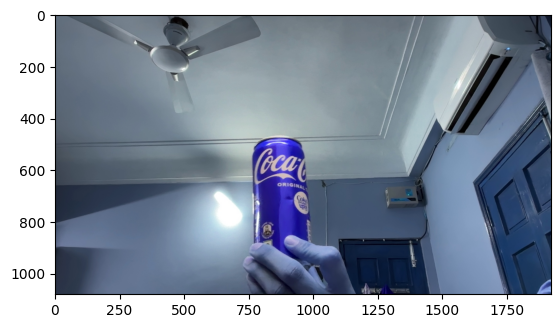

In [43]:
img = cv2.imread("your_image_path_here.jpg")
plt.imshow(img)
plt.show()


# for testing of pepsi use this file Data/pepsi/image35.jpeg

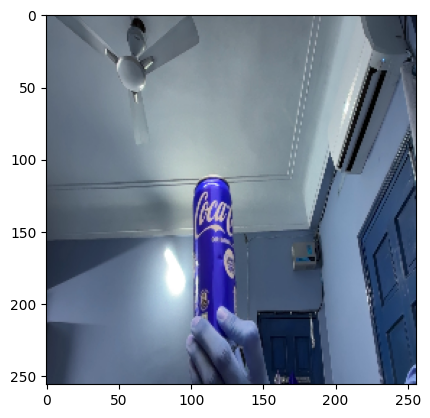

In [44]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 36ms/step


In [46]:
from gtts import gTTS
import os

if yhat > 0.5:
    text = "Predicted class is Coca-Cola"
else:
    text = "Predicted class is Pepsi"

tts = gTTS(text=text, lang="en")
tts.save("output.mp3")
os.system("start output.mp3")  # For Windows
# os.system("mpg321 output.mp3")  # For Linux

sh: start: command not found


32512

In [47]:
if yhat > 0.5:
    print(f"Predicted class is Coke")
else:
    print(f"Predicted class is Pepsi")

Predicted class is Coke


In [48]:
import cv2
import numpy as np


def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return None

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()
    return frame


def measure_can_height(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(
        edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Assume the largest contour is the can
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        return h  # Height of the can in pixels

    return None


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
image = capture_image_from_camera(image_path)
if image is not None:
    height = measure_can_height(image)
    if height is not None:
        print(f"Measured height of the can in pixels: {height}")
    else:
        print("Can not detected.")

Image saved to your_image_path_here.jpg
Measured height of the can in pixels: 277


In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join("models", "imageclassifier.h5"))

/Users/arpansethi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
